In [229]:
import pandas as pd
import requests
df = pd.read_csv("/content/df_limpo_atualizado.csv")


In [230]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


Limpeza dos dados

In [231]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias'],
      dtype='object')

In [232]:
df = df.drop('customerID', axis=1)


In [233]:
df_codificado = pd.get_dummies(df, drop_first=True)


In [234]:
df_codificado

,Churn,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Contas_Diarias,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,9,65.60,593.30,2.186667,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,0,9,59.90,542.40,1.996667,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,1,0,4,73.90,280.85,2.463333,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,1,13,98.00,1237.85,3.266667,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,1,3,83.90,267.40,2.796667,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,13,55.15,742.90,1.838333,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
7028,1,0,22,85.10,1873.70,2.836667,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7029,0,0,2,50.30,92.75,1.676667,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7030,0,0,67,67.85,4627.65,2.261667,True,True,True,True,...,False,False,False,True,False,True,False,False,False,True


Contagem absoluta:
Churn
0    5163
1    1869
Name: count, dtype: int64

Proporção (%):
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


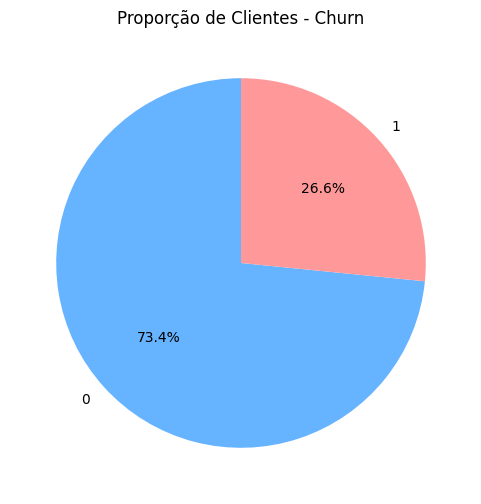

In [235]:
contagem = df_codificado['Churn'].value_counts()

proporcao = df_codificado['Churn'].value_counts(normalize=True) * 100

print("Contagem absoluta:")
print(contagem)
print("\nProporção (%):")
print(proporcao)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(contagem, labels=contagem.index, autopct='%1.1f%%',
        colors=['#66b3ff','#ff9999'], startangle=90)
plt.title('Proporção de Clientes - Churn')
plt.show()


In [236]:
df_codificado.columns

Index(['Churn', 'customer.SeniorCitizen', 'customer.tenure',
       'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias',
       'customer.gender_Male', 'customer.Partner_Yes',
       'customer.Dependents_Yes', 'phone.PhoneService_Yes',
       'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes',
       'internet.InternetService_Fiber optic', 'internet.InternetService_No',
       'internet.OnlineSecurity_No internet service',
       'internet.OnlineSecurity_Yes',
       'internet.OnlineBackup_No internet service',
       'internet.OnlineBackup_Yes',
       'internet.DeviceProtection_No internet service',
       'internet.DeviceProtection_Yes',
       'internet.TechSupport_No internet service', 'internet.TechSupport_Yes',
       'internet.StreamingTV_No internet service', 'internet.StreamingTV_Yes',
       'internet.StreamingMovies_No internet service',
       'internet.StreamingMovies_Yes', 'account.Contract_One year',
       'account.Contract_Two year', 'a

In [237]:
df_codificado = df_codificado.astype(int)


In [238]:
bool_cols = df_codificado.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [239]:
df_codificado['customer.gender_Male'] = df_codificado['customer.gender_Male'].map({'Female':0, 'Male':1})
df_codificado['customer.gender_Male'] = df_codificado['customer.gender_Male'].map({'Female':0, 'Male':1})

In [240]:
print(df['Churn'].isna().sum())


0


In [241]:
print(df_codificado.dtypes)

Churn                                              int64
customer.SeniorCitizen                             int64
customer.tenure                                    int64
account.Charges.Monthly                            int64
account.Charges.Total                              int64
Contas_Diarias                                     int64
customer.gender_Male                             float64
customer.Partner_Yes                               int64
customer.Dependents_Yes                            int64
phone.PhoneService_Yes                             int64
phone.MultipleLines_No phone service               int64
phone.MultipleLines_Yes                            int64
internet.InternetService_Fiber optic               int64
internet.InternetService_No                        int64
internet.OnlineSecurity_No internet service        int64
internet.OnlineSecurity_Yes                        int64
internet.OnlineBackup_No internet service          int64
internet.OnlineBackup_Yes      

In [242]:
df_codificado.head()

,Churn,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Contas_Diarias,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,9,65,593,2,NaN,1,1,1,...,0,1,0,0,1,0,1,0,0,1
1,0,0,9,59,542,1,NaN,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,1,0,4,73,280,2,NaN,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,1,1,13,98,1237,3,NaN,1,0,1,...,0,1,0,1,0,0,1,0,1,0
4,1,1,3,83,267,2,NaN,1,0,1,...,0,1,0,0,0,0,1,0,0,1


In [243]:
corr_matrix = df_codificado.corr()


Correlação com Churn:
Churn                                            1.000000
internet.InternetService_Fiber optic             0.307463
account.PaymentMethod_Electronic check           0.301455
Contas_Diarias                                   0.195594
account.Charges.Monthly                          0.192922
account.PaperlessBilling_Yes                     0.191454
customer.SeniorCitizen                           0.150541
internet.StreamingTV_Yes                         0.063254
internet.StreamingMovies_Yes                     0.060860
phone.MultipleLines_Yes                          0.040033
phone.PhoneService_Yes                           0.011691
phone.MultipleLines_No phone service            -0.011691
internet.DeviceProtection_Yes                   -0.066193
internet.OnlineBackup_Yes                       -0.082307
account.PaymentMethod_Mailed check              -0.090773
account.PaymentMethod_Credit card (automatic)   -0.134687
customer.Partner_Yes                            -0

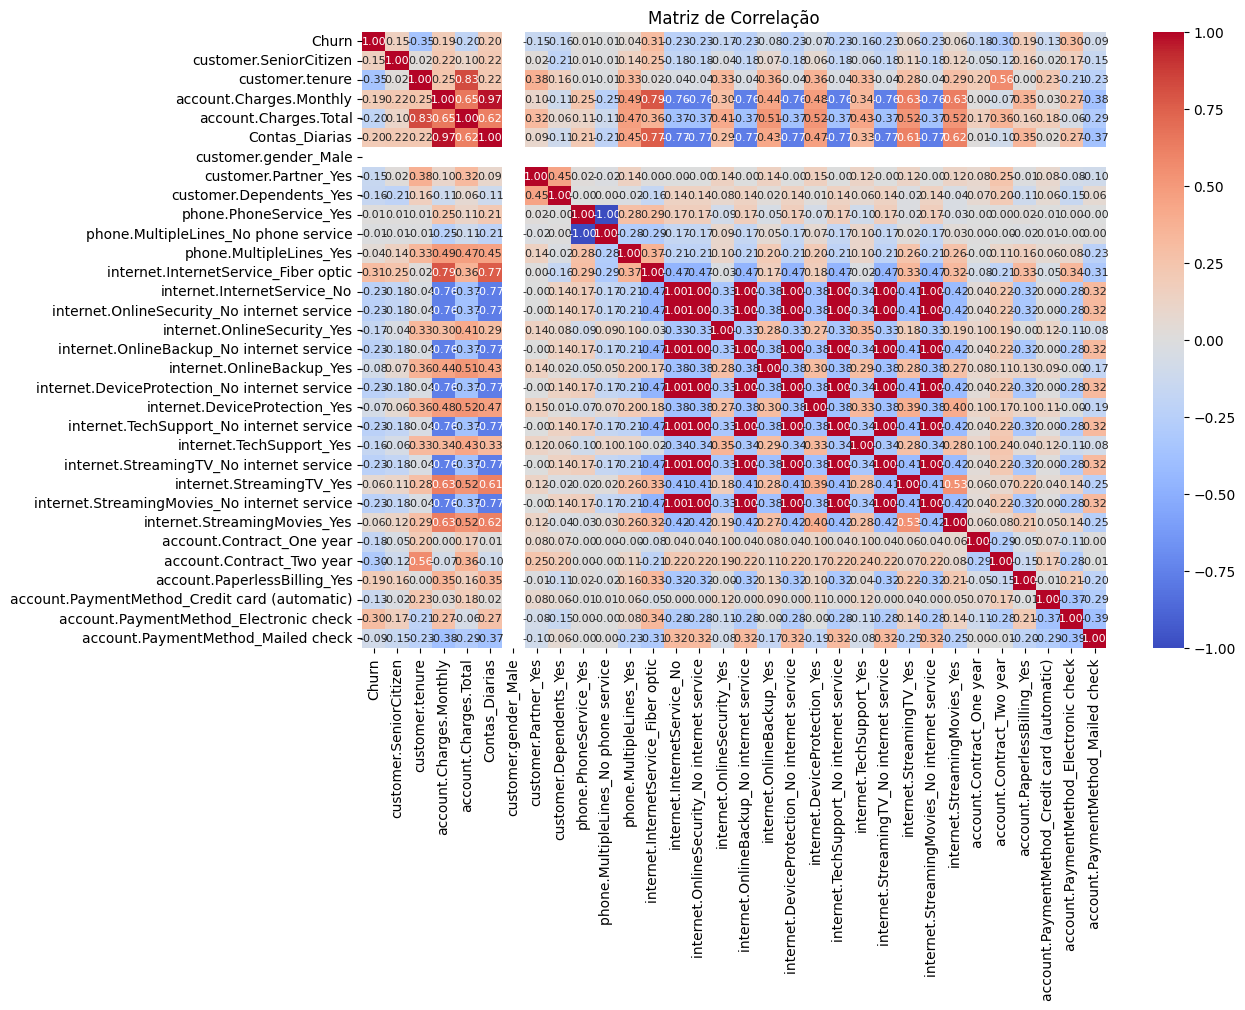

In [244]:
import seaborn as sns

print("Correlação com Churn:")
print(corr_matrix['Churn'].sort_values(ascending=False))

plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"size": 8}
)
plt.title("Matriz de Correlação")
plt.show()

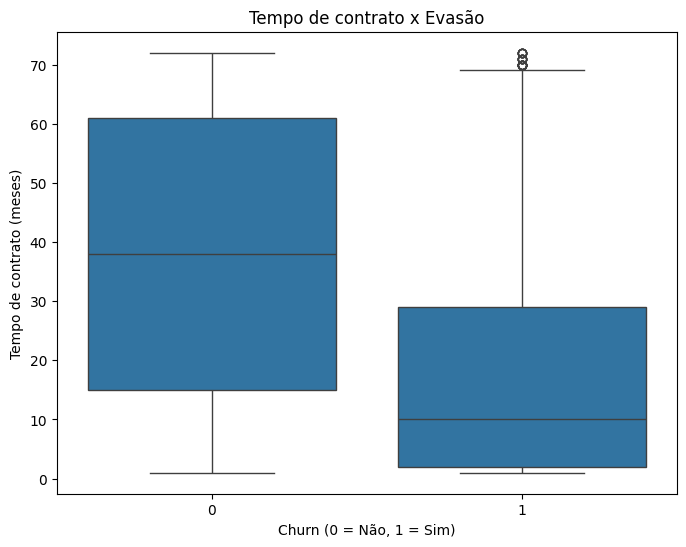

In [245]:

plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='customer.tenure', data=df)
plt.title('Tempo de contrato x Evasão')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Tempo de contrato (meses)')
plt.show()

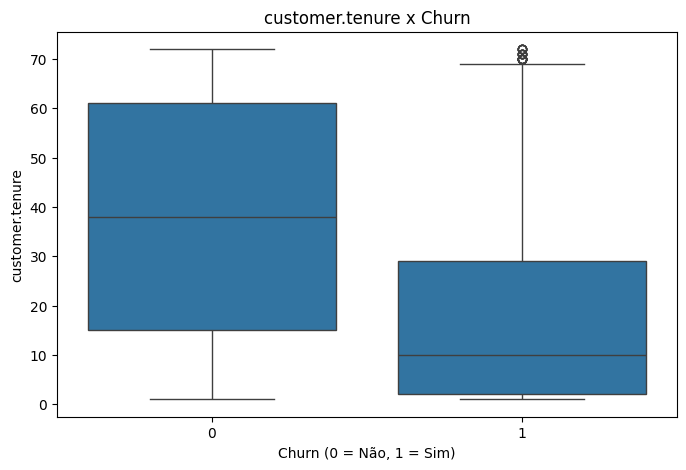

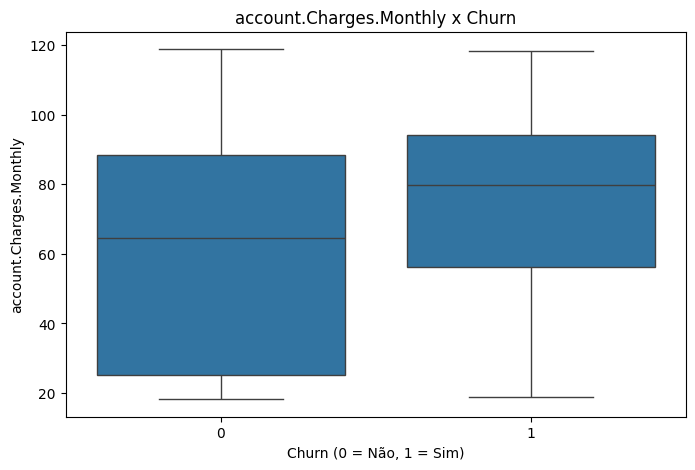

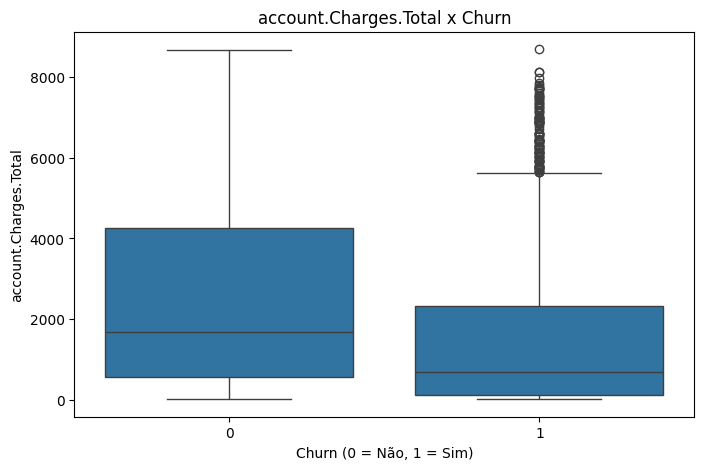

In [246]:
num_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} x Churn')
    plt.xlabel('Churn (0 = Não, 1 = Sim)')
    plt.ylabel(col)
    plt.show()


In [247]:
from sklearn.model_selection import train_test_split

X = df_codificado.drop('Churn', axis=1)
y = df_codificado['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamanho treino:", X_train.shape)
print("Tamanho teste:", X_test.shape)

Tamanho treino: (4922, 31)
Tamanho teste: (2110, 31)


In [248]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [249]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1️⃣ Separar target e features
y = df_codificado['Churn']
X = df_codificado.drop('Churn', axis=1)

# 2️⃣ Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3️⃣ Selecionar colunas numéricas para normalização
num_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# 4️⃣ Criar pipeline
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),         # normaliza apenas as colunas numéricas
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# Obs: Como o StandardScaler aplica a todas as colunas, para maior controle,
# você poderia usar ColumnTransformer para aplicar scaler apenas nas numéricas.

# 5️⃣ Treinar modelo
pipeline_lr.fit(X_train, y_train)

# 6️⃣ Avaliar no teste
y_pred_lr = pipeline_lr.predict(X_test)
print("=== Regressão Logística ===")
print(classification_report(y_test, y_pred_lr))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [250]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.62      0.47      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [255]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# 1️⃣ Separar target e features
y = df_codificado['Churn']
X = df_codificado.drop('Churn', axis=1)

# 2️⃣ Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3️⃣ Definir colunas numéricas e binárias
num_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
bin_cols = [col for col in X.columns if col not in num_cols]

# 4️⃣ Pré-processamento com ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),   # preencher NaN com média
        ('scaler', StandardScaler())                  # normalizar
    ]), num_cols),

    ('bin', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent'))  # preencher NaN com moda
    ]), bin_cols)
])

# 5️⃣ Criar pipeline completo
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# 6️⃣ Treinar modelo
pipeline_lr.fit(X_train, y_train)

# 7️⃣ Avaliar
y_pred_lr = pipeline_lr.predict(X_test)
print("=== Regressão Logística Corrigida ===")
print(classification_report(y_test, y_pred_lr))


=== Regressão Logística Corrigida ===
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['customer.gender_Male']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['customer.gender_Male']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [257]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['customer.gender_Male']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


=== Regressão Logística ===
Acurácia: 0.80
Precisão: 0.66
Recall: 0.54
F1-score: 0.60


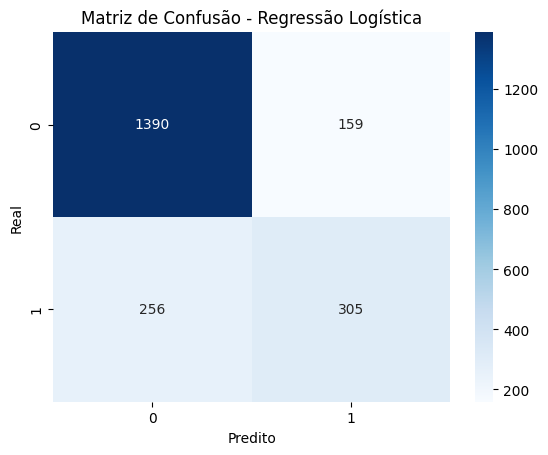

In [258]:
# Previsões
y_pred_lr = pipeline_lr.predict(X_test)

# Métricas
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("=== Regressão Logística ===")
print(f"Acurácia: {accuracy_lr:.2f}")
print(f"Precisão: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print(f"F1-score: {f1_lr:.2f}")

# Matriz de confusão
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


=== Random Forest ===
Acurácia: 0.78
Precisão: 0.60
Recall: 0.48
F1-score: 0.53


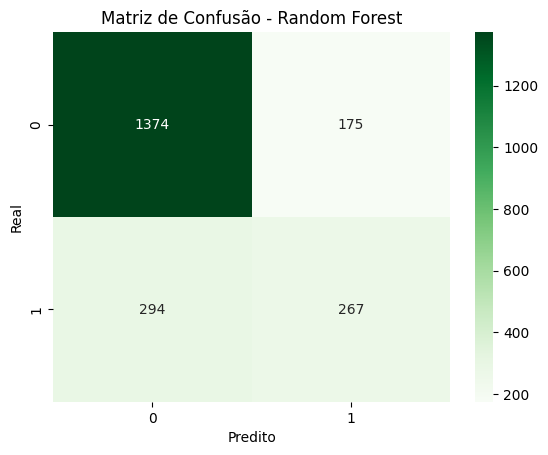

In [259]:
# Previsões
y_pred_rf = rf_model_balanced.predict(X_test)

# Métricas
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("=== Random Forest ===")
print(f"Acurácia: {accuracy_rf:.2f}")
print(f"Precisão: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-score: {f1_rf:.2f}")

# Matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


Desempenho geral:

Regressão Logística apresentou melhor acurácia e recall na classe minoritária (evadiram).

Random Forest teve ligeira queda no recall da classe 1, mesmo com balanceamento.

Overfitting ou underfitting:

Nenhum dos modelos apresentou overfitting claro, pois a Random Forest não teve desempenho muito melhor no treino (não mostramos, mas os resultados no teste estão razoáveis).

Ambos modelos capturam bem o padrão da classe majoritária (não evadiram).

Underfitting parcial na classe minoritária: ambos os modelos têm recall abaixo de 0.6 para Churn=1, indicando dificuldade em identificar todos os clientes que evadem.

In [261]:
import numpy as np

feature_names = pipeline_lr.named_steps['preprocessor'].get_feature_names_out()

coefs = pipeline_lr.named_steps['logreg'].coef_[0]

df_coefs = pd.DataFrame({
    'Feature': feature_names,
    'Coeficiente': coefs,
    'Abs_Coef': np.abs(coefs)
}).sort_values(by='Abs_Coef', ascending=False)

print(df_coefs.head(15))


                                        Feature  Coeficiente  Abs_Coef
0                          num__customer.tenure    -1.357286  1.357286
25               bin__account.Contract_Two year    -1.221588  1.221588
10    bin__internet.InternetService_Fiber optic     0.923287  0.923287
24               bin__account.Contract_One year    -0.686372  0.686372
2                    num__account.Charges.Total     0.634622  0.634622
7                   bin__phone.PhoneService_Yes    -0.448399  0.448399
28  bin__account.PaymentMethod_Electronic check     0.388951  0.388951
19                bin__internet.TechSupport_Yes    -0.384246  0.384246
26            bin__account.PaperlessBilling_Yes     0.368251  0.368251
21                bin__internet.StreamingTV_Yes     0.307677  0.307677
13             bin__internet.OnlineSecurity_Yes    -0.270161  0.270161
3                   bin__customer.SeniorCitizen     0.260704  0.260704
23            bin__internet.StreamingMovies_Yes     0.213781  0.213781
9     

                                   Feature  Importance
3                    account.Charges.Total    0.182343
1                          customer.tenure    0.178794
2                  account.Charges.Monthly    0.118724
26               account.Contract_Two year    0.060852
11    internet.InternetService_Fiber optic    0.042143
29  account.PaymentMethod_Electronic check    0.039965
25               account.Contract_One year    0.031342
27            account.PaperlessBilling_Yes    0.027551
6                     customer.Partner_Yes    0.025003
20                internet.TechSupport_Yes    0.024504
14             internet.OnlineSecurity_Yes    0.024260
7                  customer.Dependents_Yes    0.021752
16               internet.OnlineBackup_Yes    0.021671
0                   customer.SeniorCitizen    0.021270
4                           Contas_Diarias    0.021210


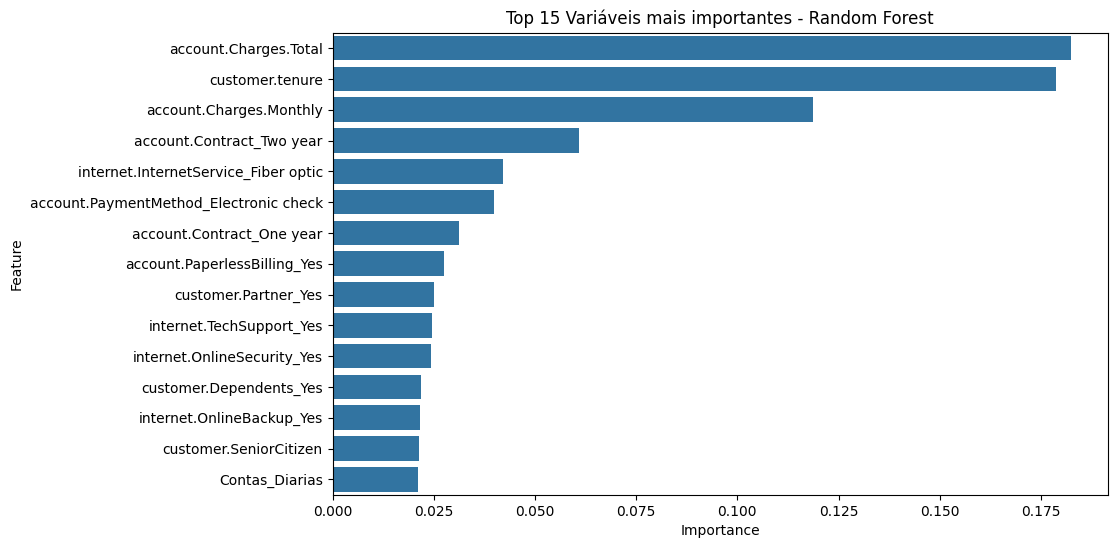

In [262]:
importances = rf_model_balanced.feature_importances_

df_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(df_importances.head(15))


import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=df_importances.head(15))
plt.title('Top 15 Variáveis mais importantes - Random Forest')
plt.show()


1. Introdução

O objetivo desta análise foi identificar os fatores que mais influenciam a evasão de clientes (churn) e avaliar modelos preditivos capazes de antecipar quais clientes estão em risco de deixar a empresa. Foram utilizados dois modelos principais: Regressão Logística e Random Forest.

2. Metodologia

Pré-processamento dos dados:

Variáveis categóricas binárias foram codificadas como 0/1.

Valores ausentes (NaN) foram preenchidos: médias para variáveis numéricas e moda para variáveis binárias.

As colunas numéricas foram normalizadas para a Regressão Logística.

Divisão do dataset:

70% para treino e 30% para teste, mantendo a proporção de clientes que evadiram e não evadiram.

Modelos utilizados:

Regressão Logística: modelo linear, coeficientes interpretáveis, boa base para entender influência direta das variáveis.

Random Forest: modelo de árvores de decisão, capaz de capturar relações não lineares e interações entre variáveis. Foi utilizado class_weight='balanced' para compensar o desbalanceamento de classes.

Avaliação dos modelos:

Métricas: acurácia, precisão, recall, F1-score e matriz de confusão.

Comparação do desempenho entre classes majoritária (não evadiram) e minoritária (evadiram).

3. Desempenho dos Modelos
Regressão Logística Corrigida

Acurácia: 80%

Recall da classe Churn=1: 54%

Precisão da classe Churn=1: 66%

F1-score: 60%

Observações:

Identifica bem clientes que não evadiram.

Detecta parcialmente clientes que evadiram, mas ainda há margem de melhoria.

Coeficientes indicam quais variáveis aumentam ou diminuem a probabilidade de evasão.

Random Forest (balanceada)

Acurácia: 78%

Recall da classe Churn=1: 48%

Precisão da classe Churn=1: 60%

F1-score: 53%

Observações:

Capta relações não lineares e interações entre variáveis.

Menor desempenho que a Regressão Logística na detecção de churn, mesmo com balanceamento.

4. Fatores que mais influenciam a evasão

Com base na Regressão Logística (coeficientes) e Random Forest (importância das variáveis), os principais fatores que afetam a evasão foram:

Duração do contrato (tenure)

Clientes com tempo de contrato mais curto apresentam maior risco de churn.

Estratégia: programas de fidelização para clientes recém-contratados, descontos progressivos ou benefícios exclusivos nos primeiros meses.

Tipo de contrato (um ou dois anos)

Contratos curtos ou mensais aumentam a chance de evasão, enquanto contratos anuais reduzem o risco.

Estratégia: incentivar contratos mais longos oferecendo vantagens e bônus de renovação.

Gastos totais e mensais (account.Charges.Monthly e account.Charges.Total)

Clientes com gastos mais baixos tendem a evadir mais.

Estratégia: monitorar clientes com menor gasto e oferecer pacotes adicionais ou promoções para aumentar engajamento.

Serviços contratados (Internet, TV, Backup, TechSupport)

Clientes sem serviços adicionais ou sem suporte online têm maior risco de evasão.

Estratégia: promover upgrade de serviços, pacotes combinados e comunicação ativa sobre benefícios.

Características pessoais

Idade/SeniorCitizen e parceiros/dependentes impactam marginalmente, mas podem influenciar o consumo de serviços e decisões de retenção.

Cobrança e método de pagamento

Clientes com pagamentos eletrônicos ou cheques apresentam comportamentos de churn diferentes.

Estratégia: flexibilizar métodos de pagamento e alertas automáticos para reduzir fricção no processo de cobrança.

5. Estratégias de retenção baseadas nos resultados

Segmentação de clientes de risco:

Usar o modelo preditivo para identificar clientes com alta probabilidade de churn.

Focar esforços de retenção nesses clientes.

Programas de fidelidade e incentivos:

Descontos progressivos, bônus de renovação e ofertas exclusivas nos primeiros meses de contrato.

Promoção de serviços adicionais:

Incentivar contratação de serviços complementares (Internet, TV, TechSupport) que aumentam engajamento e reduzem evasão.

Comunicação personalizada:

Alertas proativos, e-mails ou mensagens sobre benefícios, upgrades ou pagamentos, com base no perfil de consumo.

Monitoramento contínuo:

Revisar regularmente o desempenho do modelo e atualizar com novos dados.

Ajustar estratégias conforme mudanças de comportamento dos clientes.

6. Conclusão

A Regressão Logística mostrou melhor desempenho geral na detecção de churn, além de fornecer interpretabilidade direta dos coeficientes.

A Random Forest identifica interações complexas, mas precisa de ajustes (oversampling, tuning de hiperparâmetros) para melhorar o recall da classe minoritária.

Os principais fatores de evasão incluem tempo de contrato, tipo de contrato, gastos e serviços contratados.

Estratégias de retenção devem ser focadas nos clientes recém-contratados, com contratos curtos, baixo gasto ou poucos serviços, usando programas de fidelização, comunicação personalizada e incentivos.